# Importing necessities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/cinemaTicket_Ref.csv")

# Exploratory Data Analysis

In [4]:
# Let's see the first 5 rows of the dataset
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [5]:
# Let's see the last 5 rows of the dataset
data.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [6]:
# Let's see the shape of the dataset
data.shape

(142524, 14)

In [7]:
# Let's see the columns of the dataset
data.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [8]:
# Let's see the data types of the columns
data.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use        int64
capacity        float64
date             object
month             int64
quarter           int64
day               int64
dtype: object

In [9]:
# let's check the missing values
data.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [10]:
# Let's drop the null values
data.dropna(inplace=True)

In [11]:
# Let's check for missing values again

print("The null values are dropped")
data.isnull().sum()

The null values are dropped


film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

<ipython-input-12-e6762330a315>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

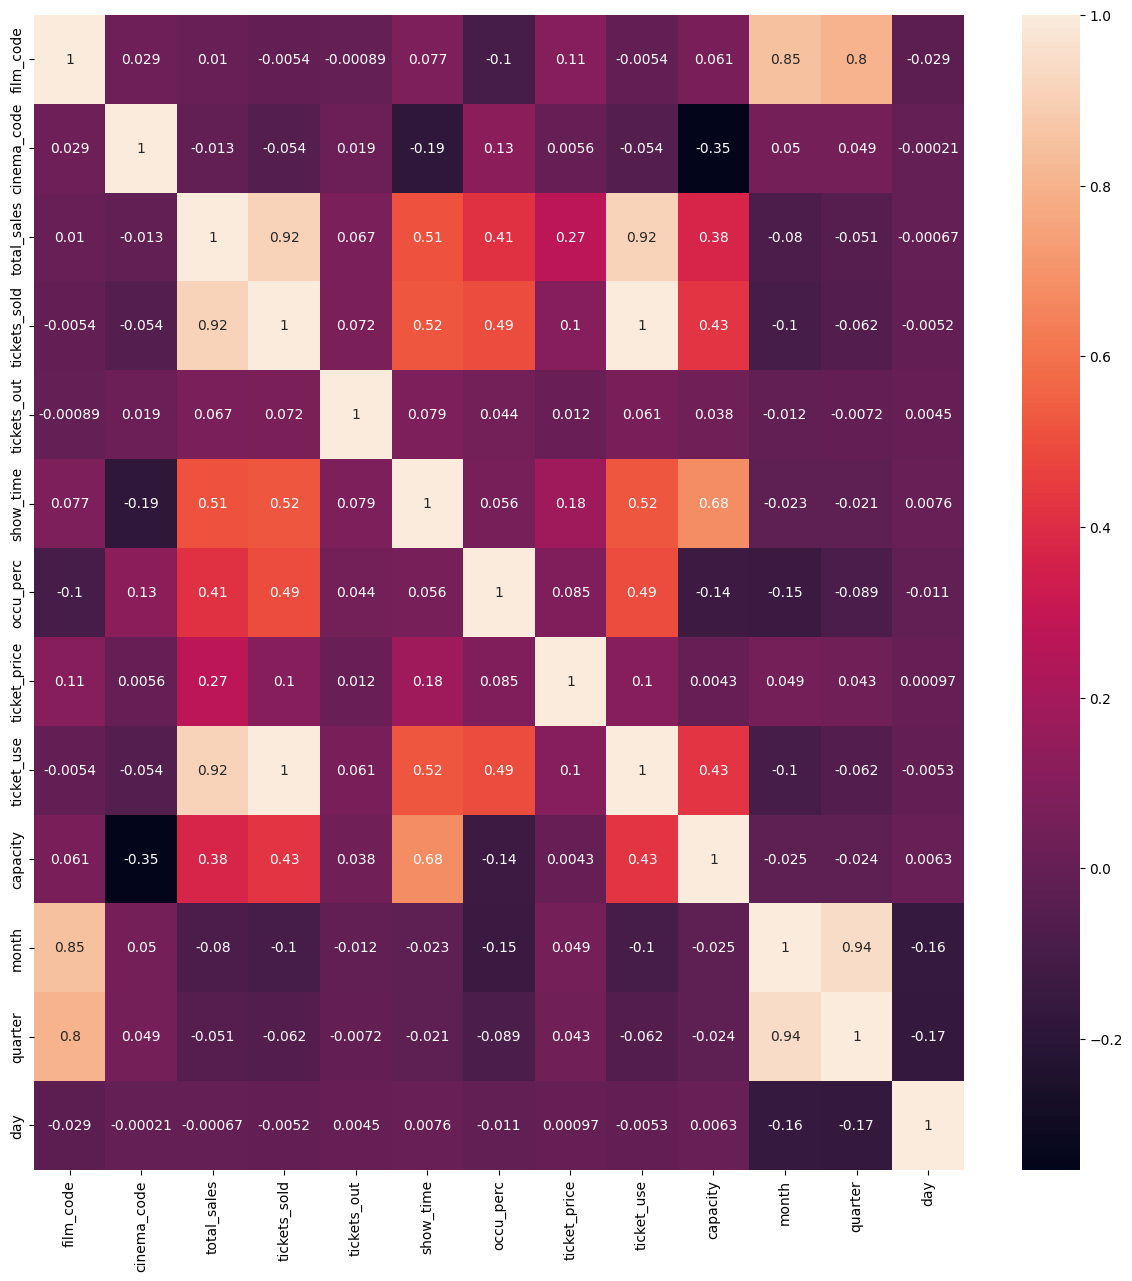

In [12]:
# Let's see the correlation between the columns
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)

In [13]:
#Assigning X values based on correlation with y
X = data[['ticket_price', 'occu_perc', 'show_time', 'tickets_sold','ticket_use','capacity']]
Y = data['total_sales']

In [ ]:
X = data[['film_code', 'tickets_sold', 'ticket_use', 'total_sales']]
Y = data['ticket_price']

In [14]:
#Splitting the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=42)

In [15]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [16]:
#PREDICTING THE DATA
y_pred = lr.predict(X_test)

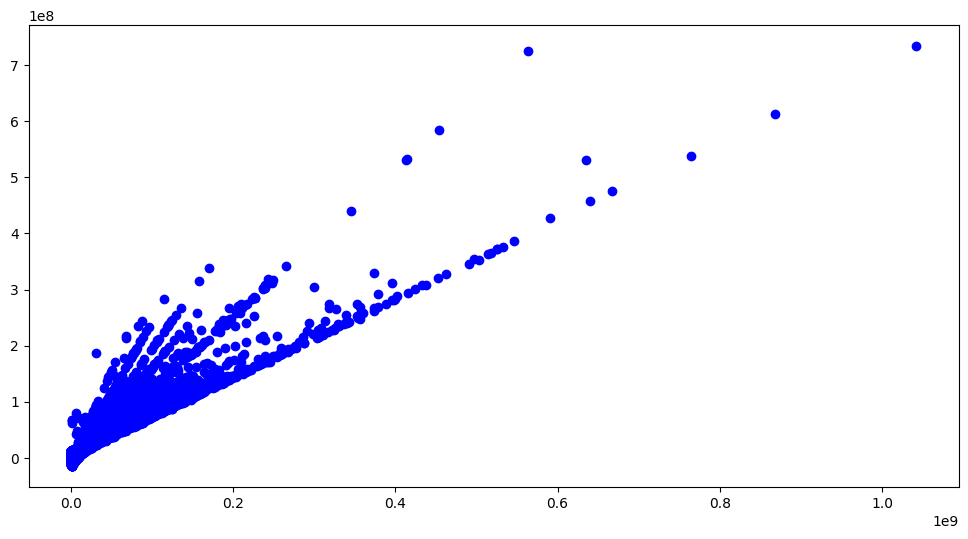

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred,color='b')
plt.show()

In [18]:
#Checking r2_score
r_squared = r2_score(Y_test, y_pred)
r_squared

0.8683180079642774

In [19]:
#Let's check for other metrics too
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred))))

MAE: 4953982.788120818
MSE: 112022344513081.6
RMSE: 10584060.870624356
